<a href="https://colab.research.google.com/github/Mobashera-Alam/CS-5783-MachineLearning/blob/main/Assignment4/Probelm2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [107]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn import tree
import numpy as np
import matplotlib.pyplot as plt

In [74]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [108]:
filename = "/content/drive/My Drive/ML/Assignment4/Asssignment4_Data.xlsx"
train = pd.read_excel(filename, sheet_name= "Train", index_col="House ID")
test = pd.read_excel(filename, sheet_name="Test", index_col="House ID")
test



,Local Price,Bathrooms,Land Area,Living area,# Garages,# Rooms,# Bedrooms,Age of home,Construction type
House ID,,,,,,,,,
24,6.0931,1.5,6.7265,1.652,1.0,6,3,44,Apartment
25,8.3607,1.5,9.1500,1.777,2.0,8,4,48,House
26,8.1400,1.0,8.0000,1.504,2.0,7,3,3,House
27,9.1416,1.5,7.3262,1.831,1.5,8,4,31,Apartment
28,12.0000,1.5,5.0000,1.200,2.0,6,3,30,Apartment


In [109]:
train['Class']=train['Construction type'].map({'Apartment':0,'Condo':1,'House':2}) #label each class as numeric for training and test data
test['Class']=test['Construction type'].map({'Apartment':0,'Condo':1,'House':2})
x_train=train.iloc[:,:8] # selecting the features
y_train=train['Class'] #Selcting labels
x_test=test.iloc[:,:8]
y_test=test['Class']

In [110]:
#Data Standardizaiton
mu = np.mean(x_train,axis=0)
std = np.std(x_train,axis=0)
norm_x_train = (x_train-mu)/std
norm_x_test = (x_test-mu)/std
#print(norm_x_test)

In [111]:
model=tree.DecisionTreeClassifier() # training decision
model.fit(norm_x_train, y_train)

DecisionTreeClassifier()

In [112]:
y_train_predict=model.predict(norm_x_train)

print("Accuracy in Training Set:",accuracy_score(y_train,y_train_predict))


Accuracy in Training Set: 1.0


In [113]:
y_test_predict=model.predict(norm_x_test)
print("Accuracy in Test Set:", accuracy_score(y_test,y_test_predict))

Accuracy in Test Set: 0.4


1. Using default parameters: (a) accuracy on training set: 1.0
(b) accuracy on test set:0.4

Text(0.5, 1.0, 'Effect of different depth on Accuracy')

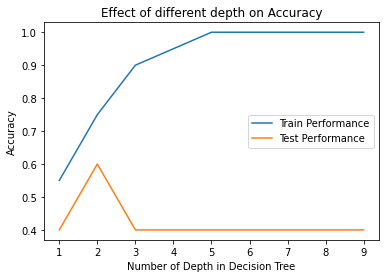

In [114]:
#Effect of maximum depth
out_train = []
out_test = []
max_depth=[1,2,3,4,5,6,7,8,9]
for i in range(len(max_depth)):
    model=tree.DecisionTreeClassifier(max_depth=max_depth[i]) 
    model.fit(norm_x_train, y_train)
    y_train_predict=model.predict(norm_x_train)
    train_acc= accuracy_score(y_train,y_train_predict)
    out_train.insert(i,train_acc)
    y_test_predict=model.predict(norm_x_test)
    test_acc=accuracy_score(y_test,y_test_predict)
    out_test.insert(i,test_acc)
plt.plot(max_depth,out_train, label='Train Performance')
plt.plot(max_depth, out_test, label = 'Test Performance')
plt.xlabel('Number of Depth in Decision Tree')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Effect of different depth on Accuracy')

2.The bias-variance issue can be dealt with number of depth. If number of depth is not restricted, it will increase the variance causing overfitting issue. Decision tree always tends to overfit due to deterministic in nature. Based on the figure number of depth 2 gives the best performance. 




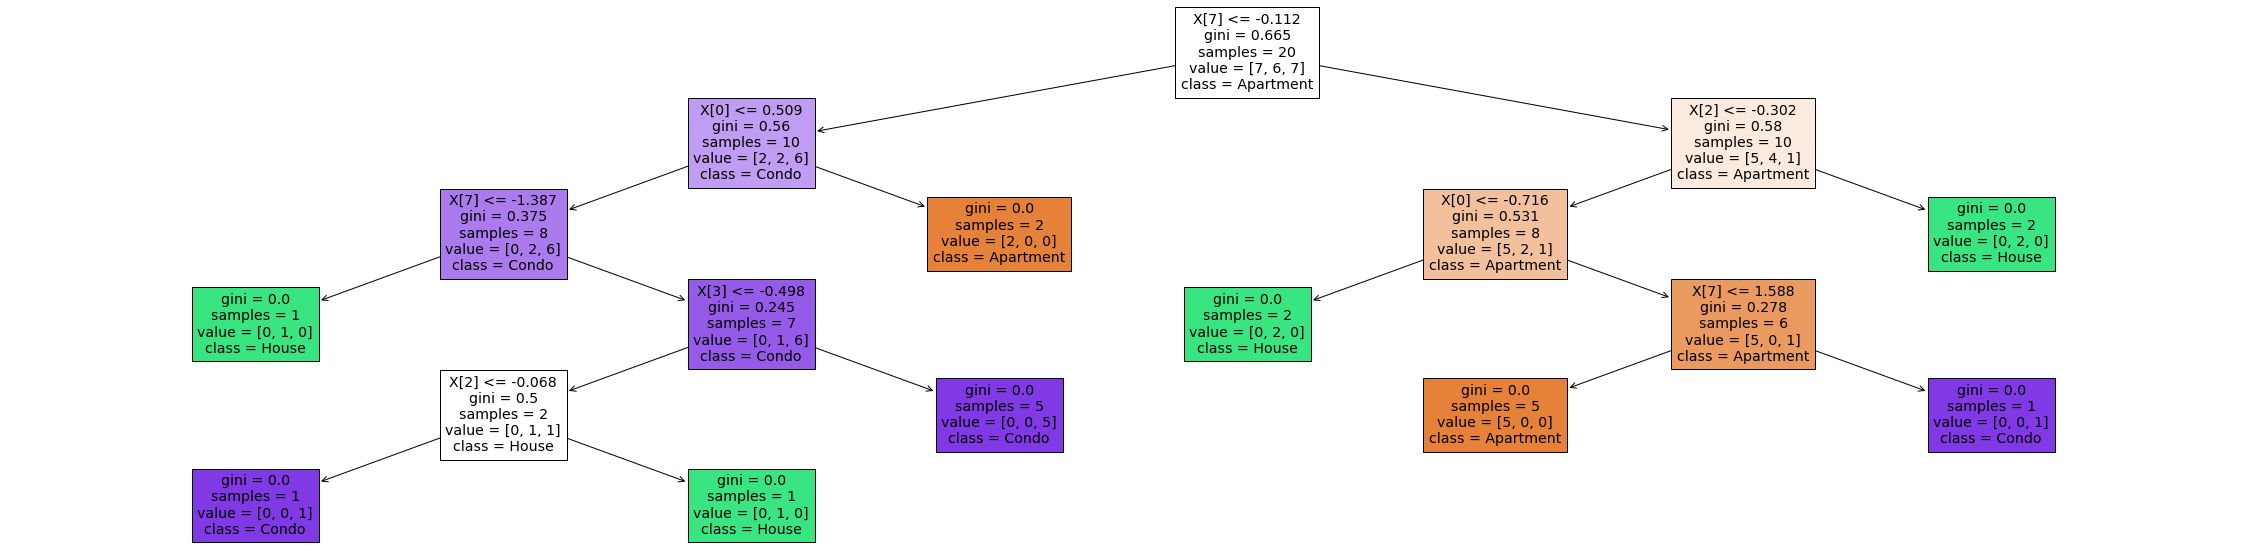

In [115]:
c =list(train['Construction type'].unique())
plt.figure(figsize=(40,10))
tree.plot_tree(model,filled=True, class_names=c)
plt.show()


In [116]:
#4. Example data
model=tree.DecisionTreeClassifier(max_depth=2) 
model.fit(norm_x_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [117]:
ex_file ="/content/drive/My Drive/ML/Assignment4/example.xlsx"
example=pd.read_excel(ex_file,index_col='House ID')

norm_ex = example-mu/std
ex_predict=model.predict(norm_ex)



In [118]:
#Define the classes based on map

r = ex_predict[0]
print("Predicted class for example data",c[r])

Predicted class for example data Apartment


3. Increasing depth enables the decision trees to capture more complex features. But since it deterministic in nature, increasing depth increasing the variance, thereby tends to overfit the data. This cause increase in generalizaiton error. 
4. Example data is Apartment based on classification.